In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Deriving features from raw data is a challenging task. Raw data usually comes as transactions, logs, records, or other granular details. Feature modeling and engineering is the process to derive useful features from numerous sources. In patient_data.csv, you find data about patients. One of the columns is BirthYear and it is not quite useful for machine learning models. One way we can make it useful is by calculating age. Diabetes is commonly seen in older people so age can be a good feature. Derive age from BirthYear and add it in a dataframe so that you can use it as a feature.

In [2]:
patients = pd.read_csv('model_data/patient_data.csv')
patients.head()

,PatientID,BirthYear,City,State,Country
0,1017,1998,Winona,Minnesota,United States
1,1031,1988,Springfield,Illinois,United States
2,1033,1992,Socorro,Texas,United States
3,1035,1998,Erie,Pennsylvania,United States
4,1048,1987,Sioux Falls,South Dakota,United States


In [3]:
patients = patients.set_index('PatientID')

In [4]:
# Make all columns lowercase!
patients.columns = map(str.lower, patients.columns)
patients.columns

Index(['birthyear', 'city', 'state', 'country'], dtype='object')

In [5]:
# https://stackoverflow.com/questions/26788854/pandas-get-the-age-from-a-date-example-date-of-birth

from datetime import datetime
from datetime import date


patients['age'] = date.today().year - patients['birthyear']



Verify age values to ensure calculated values are correct.

In [6]:
# Looks ok! 
patients['age'].describe()

count    932.000000
mean      39.051502
std       17.457007
min       20.000000
25%       25.000000
50%       33.000000
75%       48.000000
max       90.000000
Name: age, dtype: float64

Similarly, pregnancies_records.csv contains all pregnancies records. Counting the pregnancies by patient can be a useful feature. Number of pregnancies that patient has underwent can be correlated with the target variable- Outcome. Hence, it can be a good feature to add.

In [7]:
pregnancies = pd.read_csv('model_data/pregnancies_records.csv')
pregnancies.head()

,PatientID,PregnancyRecordID
0,1017,7119
1,1017,7120
2,1031,7217
3,1031,7218
4,1031,7219


In [8]:
# Get count of pregnancies
pregnancies_count = pregnancies.groupby(['PatientID'])[['PregnancyRecordID']].count()

# Let's histogram this thing!
sns.displot(x='PregnancyRecordID', data=pregnancies_count)

In [9]:
# Looks good, let's merge it into our data

patients = patients.join(pregnancies_count)
patients

,birthyear,city,state,country,age,PregnancyRecordID
PatientID,,,,,,
95,1943,Four Corners,Florida,United States,78,NaN
155,1944,Yucaipa,California,United States,77,NaN
411,1938,Yucca Valley,California,United States,83,NaN
426,1964,Casa de Oro-Mount Helix,California,United States,57,NaN
522,1956,Coeur d'Alene,Idaho,United States,65,NaN
...,...,...,...,...,...,...
17877,1975,South Gate,California,United States,46,4.0
17903,1990,Ashwaubenon,Wisconsin,United States,31,1.0
17920,1997,Lenexa,Kansas,United States,24,1.0


Explore other columns in the dataset. City, State, and Country are categorical data. Do you think it will be useful to predict whether a patient has diabetes?

In [10]:
# Country -- no because variables must vary!
# City -- probably _too_ much variability!
# State -- That's a lot of categories. Maybe you could bin them into regions or something....

patients[['city', 'state', 'country']].nunique()

city       738
state       45
country      1
dtype: int64

Good features have a direct impact on the accuracy of the ML model predicting diabetes. Hence, the task of engineering good features is the most crucial one. Some considerations:

We have three dataframes with several features. In the real-world, data will be sourced from multiple applications. They can vary by velocity, volume, variety, and value. It is always a good practice to consolidate features. Let use pandas dataframe functions to consolidate features from all three dataframes into a single dataframe.

In [11]:
diabetes = pd.read_csv('model_data/diabetes.csv')
diabetes.columns = map(str.lower, diabetes.columns)
diabetes = diabetes.set_index('patientid')
diabetes.head()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,outcome
patientid,,,,,,,
1017,101,58,17,265,24.2,0.614,0
1031,108,70,0,0,30.5,0.955,1
1033,148,60,27,318,30.9,0.150,1
1035,113,76,0,0,33.3,0.278,1
1048,83,86,19,0,29.3,0.317,0


In [12]:
diabetes.shape

(686, 7)

In [13]:
# Why not a full outer join?

diabetes = pd.concat([patients, diabetes], axis=1)
diabetes

,birthyear,city,state,country,age,PregnancyRecordID,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,outcome
95,1943,Four Corners,Florida,United States,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,1944,Yucaipa,California,United States,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,1938,Yucca Valley,California,United States,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,1964,Casa de Oro-Mount Helix,California,United States,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,1956,Coeur d'Alene,Idaho,United States,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17877,1975,South Gate,California,United States,46,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17903,1990,Ashwaubenon,Wisconsin,United States,31,1.0,122.0,90.0,51.0,220.0,49.7,0.325,1.0
17920,1997,Lenexa,Kansas,United States,24,1.0,77.0,56.0,30.0,56.0,33.3,1.251,0.0
17963,1988,Weirton Heights,West Virginia,United States,33,2.0,75.0,64.0,24.0,55.0,29.7,0.370,0.0


It may be possible that there may be records missing in any of these dataframe. Example, you may have get data for a patient but there are no data for various measures such as Glucose, Insulin, BMI, etc. Hence it is important to determine which is your primary source and how you will merge it with other sources. An important consideration is whether to use inner join or left join. Hint: we should consider diabetes.csv as primary source and it should be left joined with patient_data.csv and pregnancies_records.csv.

Verify whether you consolidated all features in one dataframe.

In [14]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.compare.html

All features are in one dataframe. The task is to explore dependent (also known as class or target variable) and independent features. Feature engineering offers several ways to explore features and treat them appropriately to make them better. You can consider some of the following:

target variable analysis: check record count and percent of the distribution of target variable- Outcome
Determine whether target variable is well balanced. At least 30% data points with positive target class indicates data is balanced.

In [15]:
pd.DataFrame(diabetes['outcome'].value_counts(normalize=True))

,outcome
0.0,0.651603
1.0,0.348397


non-target variables: Visualize value distribution by plotting on the graphs and explore the pattern

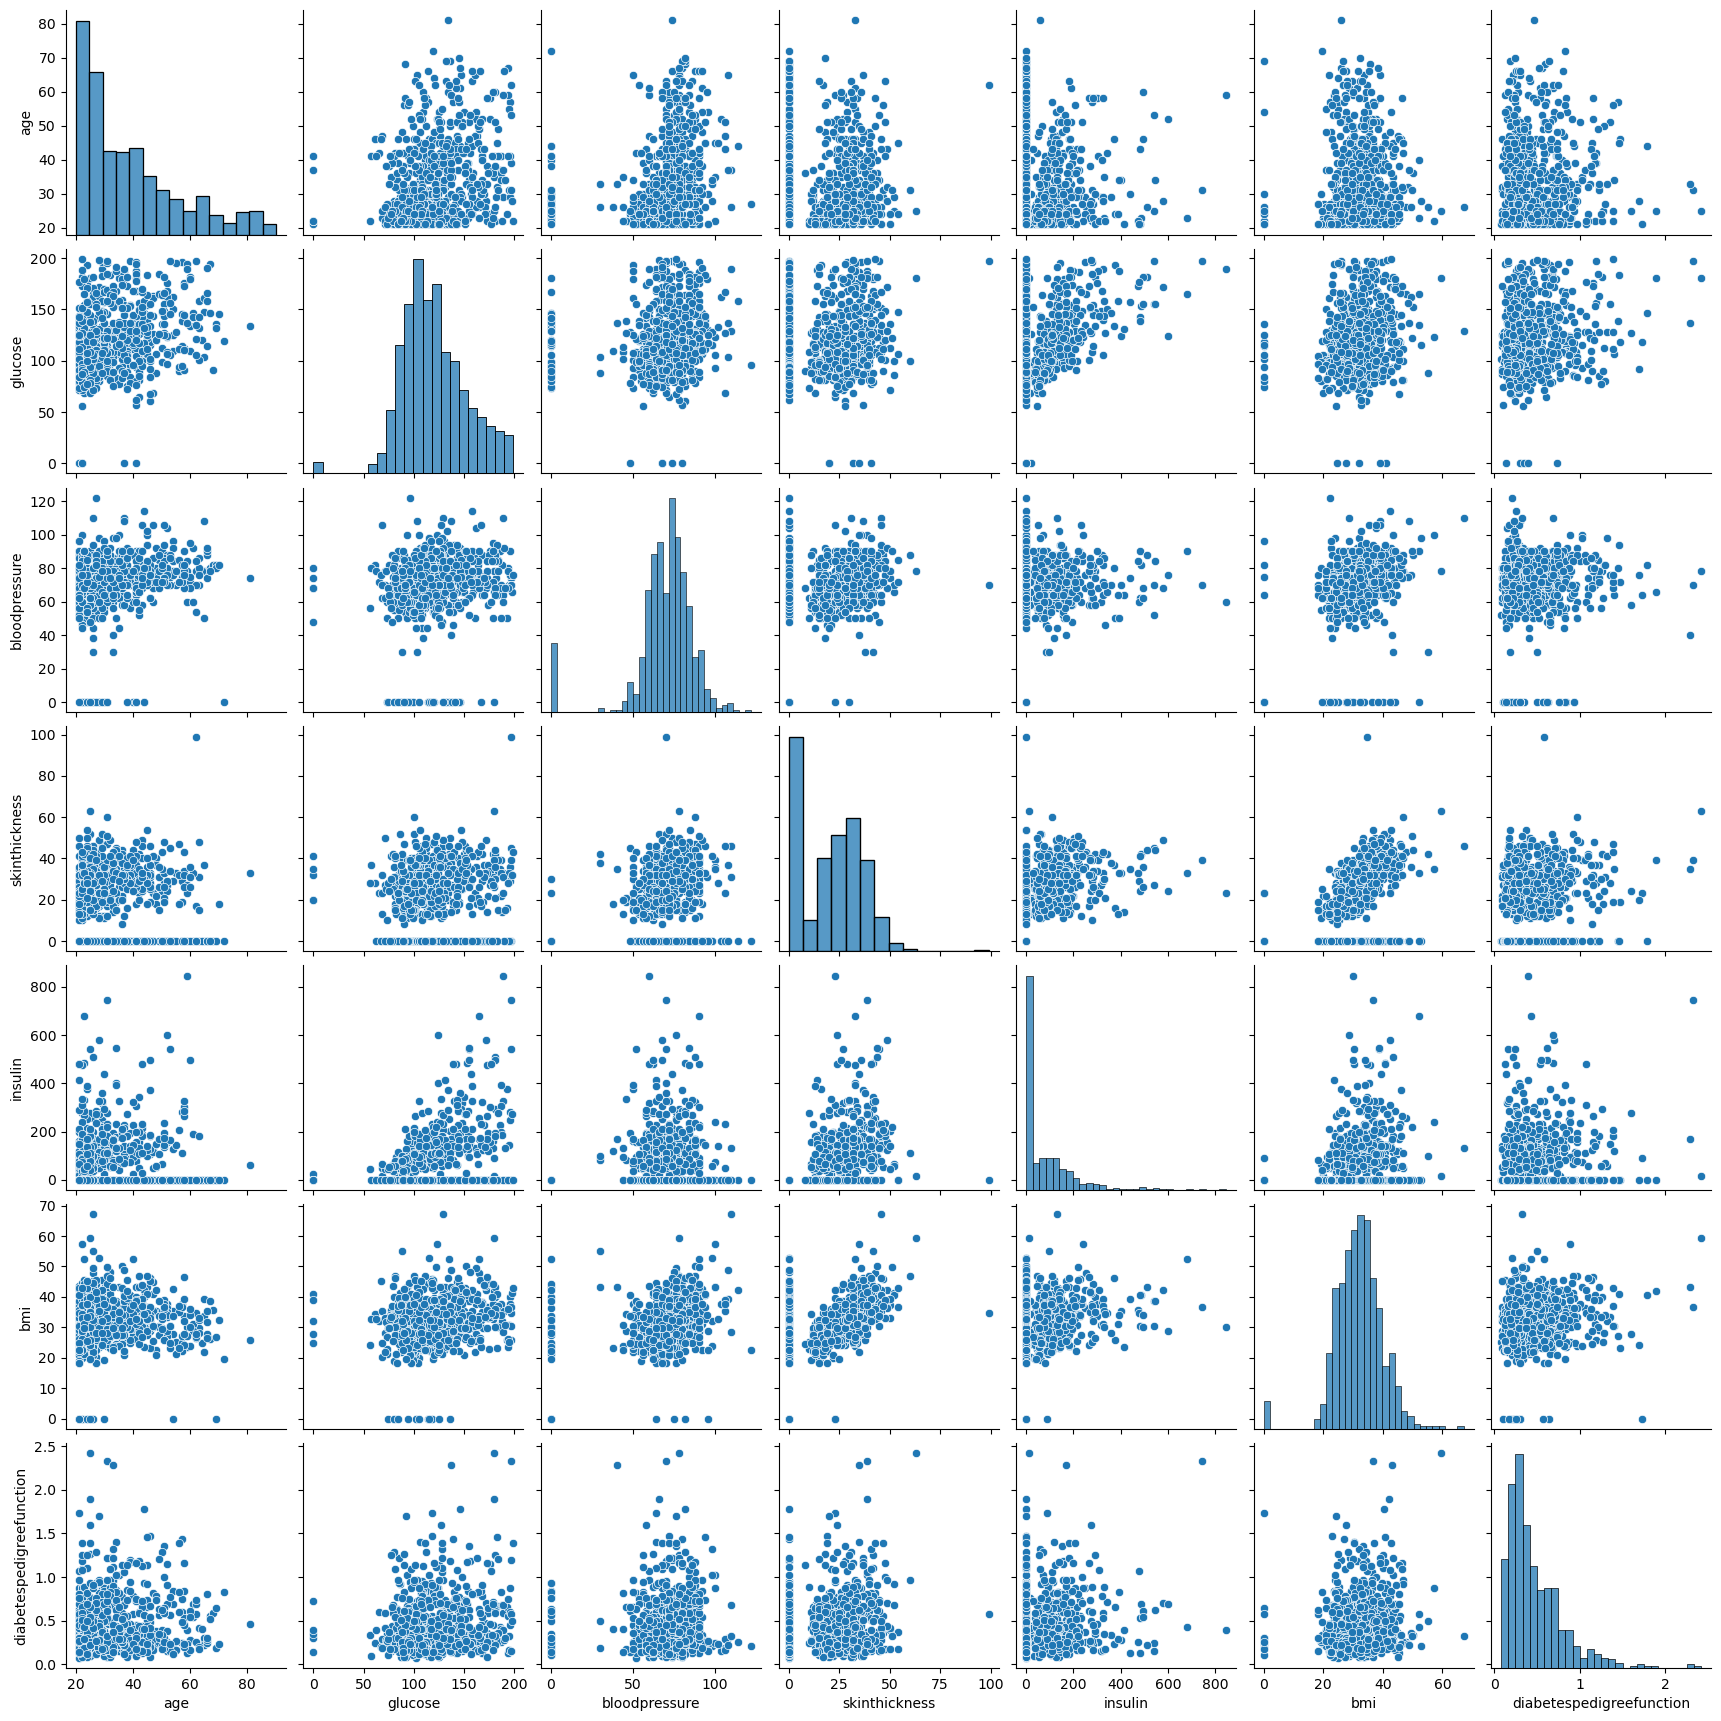

In [22]:
sns.pairplot(diabetes[['age', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction']])
plt.show()

missing values: Check dataframe for any missing values in non-target features
If there are missing values, impute missing values either with 0 or according to their distribution.

In [21]:
# That's a ton of missing values!!!
diabetes.isnull().sum()*100/diabetes.isnull().count()

birthyear                    0.000000
city                         0.000000
state                        0.000000
country                      0.000000
age                          0.000000
PregnancyRecordID           27.467811
glucose                     26.394850
bloodpressure               26.394850
skinthickness               26.394850
insulin                     26.394850
bmi                         26.394850
diabetespedigreefunction    26.394850
outcome                     26.394850
dtype: float64

outlier detection: Identify outlier with your preferred method- Z-score, IQR, or graphs.
The simplest way to treat outliers is to remove them.

In [ ]:
# Not sure

correlation: The correlation matrix is a very important table showing which features are highly correlated to the target variable.
print the correlation matrix
visualize it either using heatmap or your preferred graph

In [ ]:
sns.pairplot(diabetes[['age', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction']])
plt.show()

In [24]:
diabetes[['age', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction']].corr()

,age,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction
age,1.000000,0.280342,0.246575,-0.103980,-0.051447,0.037221,0.042310
glucose,0.280342,1.000000,0.151477,0.040823,0.346204,0.197695,0.145761
bloodpressure,0.246575,0.151477,1.000000,0.202906,0.076375,0.284236,0.035305
skinthickness,-0.103980,0.040823,0.202906,1.000000,0.440058,0.377623,0.177288
insulin,-0.051447,0.346204,0.076375,0.440058,1.000000,0.202085,0.141636
bmi,0.037221,0.197695,0.284236,0.377623,0.202085,1.000000,0.141266
diabetespedigreefunction,0.042310,0.145761,0.035305,0.177288,0.141636,0.141266,1.000000


top features: The correlation matrix shows you correlation coefficients for each feature. Identify relevant features (Coefficients values > 0.2 or 20%)
You will use the relevant features you identified here to train your ML model in upcoming projects.

You will have a dataframe with cleaned features which are ready to be used to train ML models.